In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, SGD
import random

# DataSet

# import os
import shutil
import random

def split_data(class_folder, train_folder, test_folder, split_ratio=0.8):
    # Create train and test directories for the class if they don’t exist
    os.makedirs(train_folder, exist_ok=True)
    os.makedirs(test_folder, exist_ok=True)

    # List and shuffle images
    images = os.listdir(class_folder)
    random.shuffle(images)

    # Split images into train and test
    split_index = int(len(images) * split_ratio)
    train_images = images[:split_index]
    test_images = images[split_index:]

    # Copy images to train and test folders
    for img in train_images:
        shutil.copy(os.path.join(class_folder, img), os.path.join(train_folder, img))
    for img in test_images:
        shutil.copy(os.path.join(class_folder, img), os.path.join(test_folder, img))

# Define paths for each class folder
healthy_folder = r'C:\Users\afifn\Desktop\Mini Project\CNN- image recognition\Starfruit Disease\Healthy'
unhealthy_folder = r'C:\Users\afifn\Desktop\Mini Project\CNN- image recognition\Starfruit Disease\Unhealthy'


# Define train and test directories for each class
train_healthy = 'dataset/train/healthyfruit'
test_healthy = 'dataset/test/healthyfruit'
train_unhealthy = 'dataset/train/unhealthyfruit'
test_unhealthy = 'dataset/test/unhealthyfruit'

# Split healthy and unhealthy images
split_data(healthy_folder, train_healthy, test_healthy, split_ratio=0.8)
split_data(unhealthy_folder, train_unhealthy, test_unhealthy, split_ratio=0.8)


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories for training and testing
train_dir = r'C:\Users\afifn\Desktop\Mini Project\CNN- image recognition\dataset\train'
test_dir = r'C:\Users\afifn\Desktop\Mini Project\CNN- image recognition\dataset\test'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 1120 images belonging to 2 classes.
Found 552 images belonging to 2 classes.


# Model

In [4]:
model= Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

C:\Users\afifn\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics = ['accuracy'])

In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

Epoch 1/5


C:\Users\afifn\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 18s 415ms/step - accuracy: 0.6189 - loss: 0.6123 - val_accuracy: 0.8456 - val_loss: 0.3497
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.2637
Epoch 3/5


C:\Users\afifn\anaconda3\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 295ms/step - accuracy: 0.8377 - loss: 0.3445 - val_accuracy: 0.8787 - val_loss: 0.2826
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.2640
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 316ms/step - accuracy: 0.9128 - loss: 0.2349 - val_accuracy: 0.8934 - val_loss: 0.2284


# Prediction

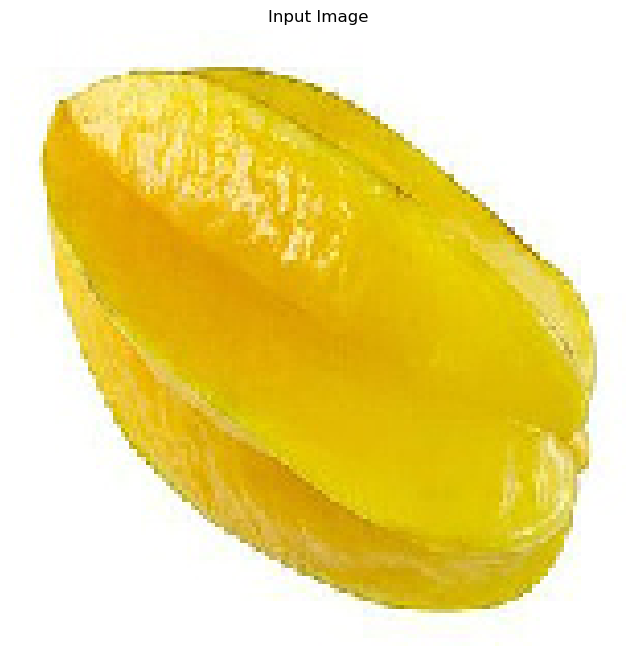

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step

Prediction: [[0.03346679]] Healthy Fruit


In [7]:
def load_and_show_image(image_path, target_size=(150, 150)):
    # Load the image
    img = image.load_img(image_path, target_size=target_size)
    
    # Display original image
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title('Input Image')
    plt.show()
    
    # Process image for prediction
    img_array = image.img_to_array(img)  # (150, 150, 3)
    img_array = np.expand_dims(img_array, axis=0) # (1, 150, 150, 3)
    img_array = img_array / 255.0            # Normalize
    
    return img_array

# Use the function
image_path = r'C:\Users\afifn\Desktop\Mini Project\CNN- image recognition\healthy (74).jpg'
processed_image = load_and_show_image(image_path)

# Make prediction
prediction = model.predict(processed_image)

# Determine class based on prediction
if prediction > 0.5:
    pred = 'Unhealthy Fruit'
else:
    pred = 'Healthy Fruit'

# Print prediction (adjust based on your model output)
print("\nPrediction:", prediction, pred)

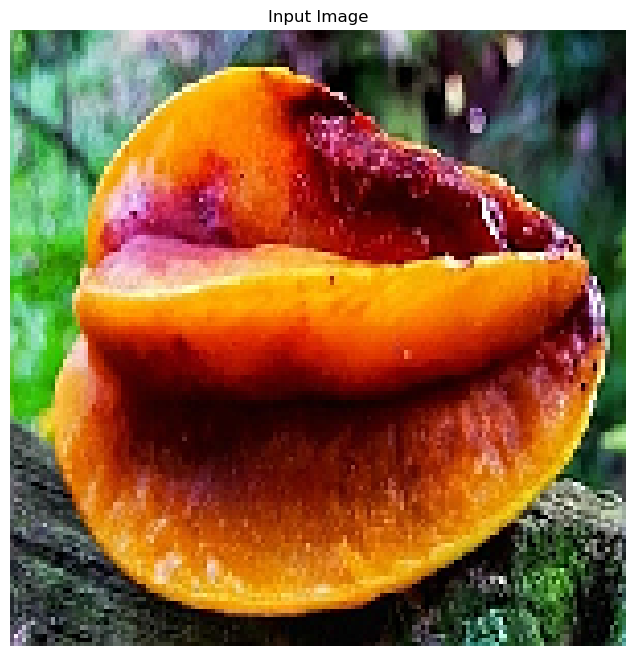

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

Prediction: [[0.999638]] Unhealthy Fruit


In [14]:
# Use the function
image_path = r'C:\Users\afifn\Desktop\Mini Project\CNN- image recognition\unhealthy (62).png'
processed_image1 = load_and_show_image(image_path)
# Make prediction
prediction1 = model.predict(processed_image1)

# Determine class based on prediction
if prediction1 > 0.5:
    pred = 'Unhealthy Fruit'
else:
    pred = 'Healthy Fruit'

# Print prediction (adjust based on your model output)
print("\nPrediction:", prediction1, pred)